In [52]:
from net_plotter import load_directions
import projection as proj
import model_loader
import h5py
import glob
import os
import sys
import torch
import evaluation
import dataloader
from torch import linalg as LA
import net_plotter
import numpy as np
from os.path import exists
import seaborn as sns
import torch.nn as nn
from scipy import spatial
from matplotlib import pyplot as plt
from plot_2D import arg_parser, plot_2d_contour
# from plot_surface import surface_parser
from pathlib import Path
sys.path.append(os.path.join(str(Path.cwd().parent), 'methods/aggregation/'))
sys.path.append(os.path.join(str(Path.cwd().parent), 'methods/'))
# import aggregators as agg
import re
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [53]:
dir_file = 'cifar10/trained_nets/gm/cct.7t_weights_xignore=biasbn_xnorm=filter_yignore=biasbn_ynorm=filter.h5'
directions = load_directions(dir_file)
dx = proj.nplist_to_tensor(directions[0])
dy = proj.nplist_to_tensor(directions[1])

In [54]:
dir_path = '/home/shenghui/RobustFL/loss-landscape/cifar10/trained_nets/gm/updates'
proj_update = []
model_paths = os.path.join(dir_path, '*.7t')

data = []
update_names = []
for path in glob.glob(model_paths):
#     if 'True' in path:
#         continue
    update = model_loader.load('cifar10', 'cct_2_3x2_32', path)
    w = net_plotter.get_weights(update)
    d = proj.tensorlist_to_tensor(w)
    print(np.linalg.norm(d.numpy()))
    data.append(d.numpy())
    update_names.append(path.split('/')[-1])

40.75808
1.309346
1.1583779
118.007126
1.1492155
1.2037086
1.309346
1.1800712
1.1316608
120.37087
1.1581103
1.3093461
1.3093458
1.2043562
1.309346
118.14669
1.309346
115.51686
115.81103
1.2206088
113.16608
119.25219
1.1001132
1.1551687
1.3093458
1.1814669
1.1038033
1.1925218
122.06089
1.3093462


In [55]:
updates

array([[ 2.70664372e-04,  6.46740664e-04,  1.59943418e-03, ...,
        -9.90515458e-04, -3.28374188e-03, -1.13454735e-05],
       [-1.57135017e-02, -1.68530550e-02, -1.93994436e-02, ...,
        -3.02620698e-03, -2.69089756e-03, -1.12868620e-04],
       [ 2.81530793e-05,  2.85016049e-05,  2.39435358e-05, ...,
        -2.11302613e-05,  1.50281237e-04, -1.58222356e-05],
       ...,
       [ 3.69607611e-03, -6.30615931e-03, -6.93390891e-03, ...,
        -4.21386166e-03, -6.05590641e-03,  3.61503626e-04],
       [-6.06655469e-03,  2.92518968e-03,  9.52813216e-03, ...,
        -4.79021226e-04, -1.01584615e-02, -7.47858221e-03],
       [-1.50109889e-04, -1.02090235e-04, -9.01250751e-05, ...,
        -2.34999825e-05,  1.55327478e-04, -1.85361423e-05]], dtype=float32)

In [56]:
updates = np.stack(data)

In [57]:
len(updates)

30

In [58]:
pca = PCA(n_components=2, svd_solver='full')
res = pca.fit_transform(updates)

1.0 0.0 aggregated_cct.7t
-0.9128165245056152 40.71599 5Falsecct.7t
-0.9132670164108276 39.64256 14Falsecct.7t
0.9523687958717346 71.374664 15Truecct.7t
-0.913648784160614 39.66865 19Falsecct.7t
-0.9161627292633057 39.60575 6Falsecct.7t
-0.9134511351585388 40.747524 16Falsecct.7t
-0.9122908115386963 39.595337 1Falsecct.7t
-0.9117160439491272 39.64363 9Falsecct.7t
0.790082573890686 77.08432 4Truecct.7t
-0.9132828712463379 39.622196 10Falsecct.7t
-0.9129213690757751 40.7101 3Falsecct.7t
-0.9136438369750977 40.728695 7Falsecct.7t
-0.9135006070137024 39.612255 13Falsecct.7t
-0.9133605360984802 40.660454 17Falsecct.7t
0.8321682214736938 71.95618 17Truecct.7t
-0.9141000509262085 40.70738 11Falsecct.7t
0.7309640645980835 73.735504 7Truecct.7t
0.9207363724708557 69.31122 5Truecct.7t
-0.9127858281135559 39.546497 8Falsecct.7t
0.9697718620300293 66.57011 16Truecct.7t
0.9957889318466187 75.61575 3Truecct.7t
-0.9135442972183228 39.625378 truemean_cct.7t
-0.9169601798057556 39.671616 0Falsecct.7t
-

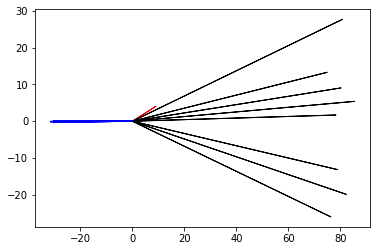

In [59]:
fig = plt.figure()
# plt.yscale('symlog')
# plt.xscale('symlog')
for update,name in zip(res, update_names):
    loc = update
#     print(loc, name)
    if 'agg' in name:
        is_corrupted = 'agg'
        for update_client,client_id in zip(res, update_names): 
            dis = np.linalg.norm(update-update_client)
            cos = 1 - spatial.distance.cosine(update, update_client)
            print(cos, dis, client_id)
        wd = 0.01
    else:
        is_corrupted = 'True' if 'True' in name else 'False'
        wd = 0.01
    if is_corrupted == 'agg':
        color = 'red'
#         plt.arrow(x=0, y=0, dx=loc[0], dy=loc[1], width=.0005, color=color) 
    elif is_corrupted == 'True':
        color = 'black'
    else:
        color = 'blue'
    plt.arrow(x=0, y=0, dx=loc[0], dy=loc[1], width=wd, color=color) 
    
plt.show()

In [63]:
dir_path = '/home/shenghui/RobustFL/loss-landscape/cifar10/trained_nets/gm/updates'
proj_update = []
model_paths = os.path.join(dir_path, '*.7t')
path = os.path.join(dir_path, '1Falsecct.7t')
update = model_loader.load('cifar10', 'cct_2_3x2_32', path)

para_trusted = update.state_dict()
update_list = [para_trusted]
w = net_plotter.get_weights(update)
trusted = proj.tensorlist_to_tensor(w)
for path in glob.glob(model_paths):
    if '/cct.7t' in path:
        continue
    update = model_loader.load('cifar10', 'cct_2_3x2_32', path)
    w = net_plotter.get_weights(update)
    para = update.state_dict()
    if 'agg' not in path:
        update_list.append(para)
#     model_sim = cos_sim(para_trusted, para)
    d = proj.tensorlist_to_tensor(w)
    similarity = proj.cal_angle(d, dx)
    if '1Falsecct' in path:
#         print(d)
        pass
    loc = proj.project_2D(d, dx, dy, 'lstsq')
    loc = proj.project_2D(d, dx, dy, 'cos')
    client_id = None
    if 'agg' in path:
        is_corrupted = 'agg'
    elif 'true' in path:
        is_corrupted = 'true_mean'
    else:
        client_id = int(re.findall(r'\d+', path.split('/')[-1].split('.')[0])[0])
        is_corrupted = 'True' if 'True' in path else 'False'
    print(similarity, similarity if similarity > 0 else 0, is_corrupted, client_id)
    proj_update.append((loc, is_corrupted, client_id))

tensor(0.9948) tensor(0.9948) agg None
tensor(-0.0035) 0 False 5
tensor(0.9447) tensor(0.9447) False 14
tensor(0.9448) tensor(0.9448) True 15
tensor(0.9344) tensor(0.9344) False 19
tensor(0.9386) tensor(0.9386) False 6
tensor(-0.0272) 0 False 16
tensor(0.9448) tensor(0.9448) False 1
tensor(0.9393) tensor(0.9393) False 9
tensor(0.9386) tensor(0.9386) True 4
tensor(0.9465) tensor(0.9465) False 10
tensor(0.0009) tensor(0.0009) False 3
tensor(-0.0084) 0 False 7
tensor(0.9369) tensor(0.9369) False 13
tensor(0.0448) tensor(0.0448) False 17
tensor(0.9302) tensor(0.9302) True 17
tensor(0.0106) tensor(0.0106) False 11
tensor(0.9343) tensor(0.9343) True 7
tensor(0.9465) tensor(0.9465) True 5
tensor(0.9529) tensor(0.9529) False 8
tensor(0.9393) tensor(0.9393) True 16
tensor(0.9377) tensor(0.9377) True 3
tensor(1.0000) tensor(1.0000) true_mean None
tensor(0.9343) tensor(0.9343) False 0
tensor(0.0054) tensor(0.0054) False 15
tensor(0.9302) tensor(0.9302) False 2
tensor(0.9434) tensor(0.9434) False 

In [64]:
proj_update

[((1.8970887660980225, -0.025450333952903748), 'agg', None),
 ((-0.00452379509806633, -0.0030995833221822977), 'False', 5),
 ((1.0943502187728882, 0.0008442822145298123), 'False', 14),
 ((3.344686508178711, -0.05100463703274727), 'True', 15),
 ((1.0738755464553833, -0.007451665122061968), 'False', 19),
 ((1.129818320274353, -0.018931886181235313), 'False', 6),
 ((-0.035557545721530914, 0.009367822669446468), 'False', 16),
 ((1.1148957014083862, -0.017001552507281303), 'False', 1),
 ((1.0629427433013916, -0.012170389294624329), 'False', 9),
 ((3.3894553184509277, -0.05679561570286751), 'True', 4),
 ((1.0961735248565674, -0.020669423043727875), 'False', 10),
 ((0.0011805674294009805, 0.00914215948432684), 'False', 3),
 ((-0.011004647240042686, 0.010637542232871056), 'False', 7),
 ((1.1284157037734985, -0.015659799799323082), 'False', 13),
 ((0.058720123022794724, -0.008948530070483685), 'False', 17),
 ((3.296967029571533, -0.0737089067697525), 'True', 17),
 ((0.013920350931584835, 0.0117

In [79]:
args = arg_parser()
args.surf_file = 'cifar10/trained_nets/gm/cct.7t_weights_xignore=biasbn_xnorm=filter_yignore=biasbn_ynorm=filter.h5_[-1.0,3.5,21]x[-0.2,0.2,21].h5'

In [80]:
def plot_contour(surf_file, surf_name='train_loss', updates=None, vmin=0.1, vmax=10, vlevel=0.5, show=False):
    """Plot 2D contour map and 3D surface."""

    f = h5py.File(surf_file, 'r')
    x = np.array(f['xcoordinates'][:])
    y = np.array(f['ycoordinates'][:])
    X, Y = np.meshgrid(x, y)

    if surf_name in f.keys():
        Z = np.array(f[surf_name][:])
    elif surf_name == 'train_err' or surf_name == 'test_err' :
        Z = 100 - np.array(f[surf_name][:])
    else:
        print ('%s is not found in %s' % (surf_name, surf_file))

    print('------------------------------------------------------------------')
    print('plot_2d_contour')
    print('------------------------------------------------------------------')
    print("loading surface file: " + surf_file)
    print('len(xcoordinates): %d   len(ycoordinates): %d' % (len(x), len(y)))
    print('max(%s) = %f \t min(%s) = %f' % (surf_name, np.max(Z), surf_name, np.min(Z)))

    if (len(x) <= 1 or len(y) <= 1):
        print('The length of coordinates is not enough for plotting contours')
        return

    # --------------------------------------------------------------------
    # Plot 2D contours
    # --------------------------------------------------------------------
    fig = plt.figure()
    CS = plt.contour(X, Y, Z, cmap='summer', levels=np.arange(vmin, vmax, vlevel))
    plt.clabel(CS, inline=1, fontsize=8)
    for update in updates:
        loc = update[0]
        is_corrupted = update[1]
        if is_corrupted == 'agg':
            color = 'red'
#             plt.arrow(x=0, y=0, dx=loc[0], dy=loc[1], width=.005, color=color) 
#         elif update[2] == 1:
#             color = 'red'
        elif is_corrupted == 'True':
            color = 'black'
        else:
            color = 'blue'
        plt.arrow(x=0, y=0, dx=loc[0], dy=loc[1], width=.0005, color=color) 
#     plt.ylim(-0.1, 0.1)
    plt.show()
    

------------------------------------------------------------------
plot_2d_contour
------------------------------------------------------------------
loading surface file: cifar10/trained_nets/gm/cct.7t_weights_xignore=biasbn_xnorm=filter_yignore=biasbn_ynorm=filter.h5_[-1.0,3.5,21]x[-0.2,0.2,21].h5
len(xcoordinates): 21   len(ycoordinates): 21
max(train_loss) = 2.619820 	 min(train_loss) = 1.952767


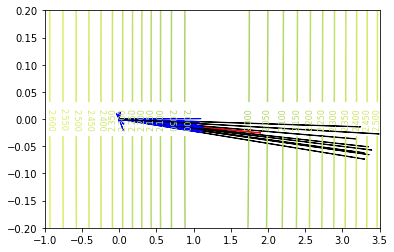

In [83]:
args.vlevel = 0.05
args.vmax = 3
plot_contour(args.surf_file, args.surf_name, proj_update, args.vmin, args.vmax, args.vlevel, args.show)

------------------------------------------------------------------
plot_2d_contour
------------------------------------------------------------------
loading surface file: cifar10/trained_nets/gm/cct.7t_weights_xignore=biasbn_xnorm=filter_yignore=biasbn_ynorm=filter.h5_[-1.0,3.0,21]x[-1.0,1.0,21].h5
len(xcoordinates): 21   len(ycoordinates): 21
max(train_loss) = 2.630344 	 min(train_loss) = 1.953998
[[2.63034409 2.57349283 2.51712618 2.45918587 2.3971023  2.32848982
  2.25267983 2.17269679 2.0960544  2.03276602 1.99088544 1.973218
  1.97759545 1.99922543 2.0330014  2.07465751 2.12219345 2.17457274
  2.23087831 2.29076322 2.353808  ]
 [2.6284029  2.57156142 2.51512253 2.45714528 2.39502414 2.32633686
  2.25042782 2.17026808 2.09335383 2.02977667 1.98767535 1.96988046
  1.97416092 1.99560995 2.02936615 2.07102668 2.1187198  2.1712536
  2.22775368 2.2877874  2.35095   ]
 [2.62664371 2.56976698 2.51335795 2.45535074 2.39318066 2.32445638
  2.24844034 2.16813248 2.0909774  2.02710525 1.9847

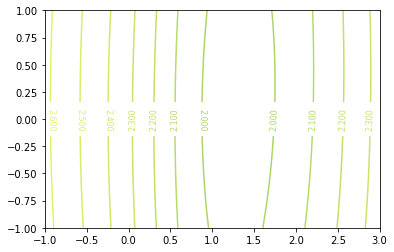

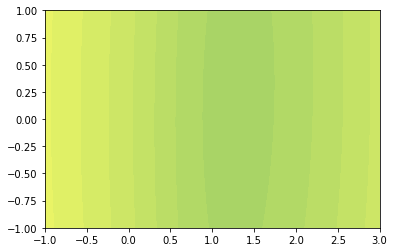

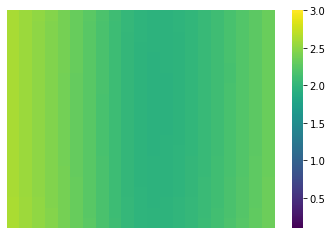

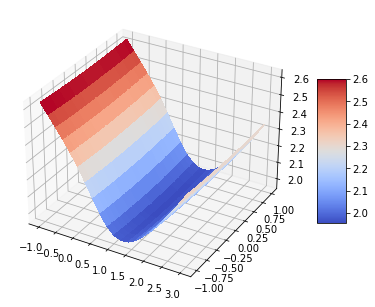

In [70]:
plot_2d_contour(args.surf_file, args.surf_name, args.vmin, args.vmax, args.vlevel, args.show)

In [71]:
class Args():
    def __init__(self):
        self.dataset = 'cifar10'
        self.model = 'cct_2_3x2_32'
        self.datapath = 'cifar10/data'
        self.batch_size = 32
        self.threads = 24
        self.raw_data = False
        self.trainloader = ''
        self.testloader = ''
        self.cuda = True
        self.dir_type = 'weights'
        self.ignore = ''
        self.model_folder = 'cifar10/trained_nets/gm/updates'
        
args = Args()
trainloader, testloader = dataloader.load_dataset(args.dataset, args.datapath,
                            args.batch_size, args.threads, 
                            trainloader_path = args.trainloader, testloader_path = args.testloader)

Files already downloaded and verified


In [25]:
dir_path = 'cifar10/trained_nets/gm'
proj_update = []
model_paths = os.path.join(dir_path, '*.7t')
path = os.path.join(dir_path, 'updates', '1Falsecct.7t')
update = model_loader.load('cifar10', 'cct_2_3x2_32', path)
update_state = update.state_dict()

model_path = os.path.join(dir_path, 'cct.7t')
model = model_loader.load('cifar10', 'cct_2_3x2_32', model_path)
model_state = model.state_dict()

In [26]:
for k in model_state.keys():
    model_state[k] += update_state[k]
model.load_state_dict(model_state)

<All keys matched successfully>

In [27]:
criterion = nn.CrossEntropyLoss()
evaluation.eval_loss(model, criterion, trainloader, args.cuda)

(1.181529829826355, 57.314)